In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [2]:
car_pd = pd.read_csv("CarPrice.csv")
car_pd

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
word_columns = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']
for col in word_columns:
    print(col,":",car_pd[col].unique())

symboling : [ 3  1  2  0 -1 -2]
fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [4]:
car_data = car_pd.copy()
car_pd.pop('car_ID')
car_pd.pop('CarName')
car_pd["cylindernumber"] = car_pd["cylindernumber"].replace(
    {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
car_pd.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
num_columns = car_pd.columns.drop(word_columns)


In [6]:
print(num_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [7]:
def OneHotEncoder(dataframe, column):
    obj = dataframe[column].unique().tolist()
    for i in range(len(dataframe)):
        dataframe.loc[i,column] = obj.index(dataframe.loc[i,column])

In [8]:
#去重查看CarName
print(car_data['CarName'].drop_duplicates())#验证是否object全部改为数值类型


0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [9]:
#利用split，由CarName拆出品牌信息
carBrand = car_data['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))


{'nissan', 'peugeot', 'subaru', 'buick', 'volkswagen', 'vokswagen', 'mercury', 'volvo', 'vw', 'dodge', 'saab', 'mazda', 'toyota', 'chevrolet', 'alfa-romero', 'maxda', 'porcshce', 'bmw', 'porsche', 'toyouta', 'renault', 'honda', 'audi', 'jaguar', 'isuzu', 'plymouth', 'Nissan', 'mitsubishi'}


In [10]:
#修改品牌名称的不规则命名
carBrand = carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_data['carBrand'] = carBrand
print(len(set(carBrand)))

{'nissan', 'peugeot', 'subaru', 'buick', 'volkswagen', 'volvo', 'mercury', 'dodge', 'saab', 'mazda', 'toyota', 'chevrolet', 'alfa-romero', 'bmw', 'porsche', 'renault', 'honda', 'audi', 'jaguar', 'isuzu', 'plymouth', 'mitsubishi'}
22


In [11]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


在汽车销售等实际业务中，很多消费者购买需求有时会根据考虑车型的大小来考虑。
欧系分类，按德国标准，车型大小可按照车长，轴距划分为6类：(单位：英寸)
按车身长度分类界限：微型车： A00 <145.67 ；小型车： A0 <169.29 ；紧凑型车：A <181.10 ；中型车： B <192.91 ；中大型车：C <200.79 ；大型车： D >200.79

In [12]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_pd.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_pd.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_pd.carlength,bins,labels=label)
print(carSize.unique())

#将车型大小分类放入数据集中
car_data['carSize']=carSize
car_pd['carSize']=carSize


['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']


In [13]:
#查看数值型特征的相关系数
df_corr=car_pd.corr()
df_corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


相关系数分类： 0.8-1.0 极强相关；0.6-0.8 强相关；0.4-0.6 中等程度相关；0.2-0.4 弱相关；0.0-0.2 极弱相关或无相关
由热力图可看出： 车长、宽、轴距三者都极强相关，整备质量和车长、宽、发动机尺寸极强相关，价格与车整备质量、发动机尺寸、马力具有极强相关性，等等。部分数据之间存在高度相似，数据存在冗余。

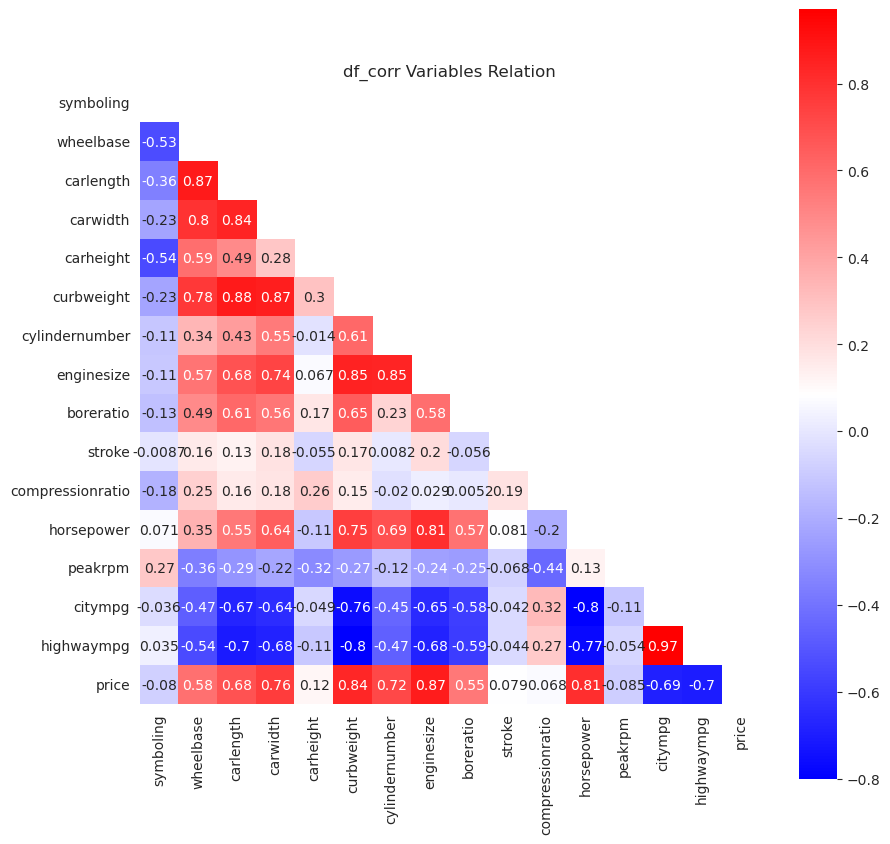

In [14]:
#绘制相关性热力图
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax=sns.heatmap(df_corr,mask=mask,square=True,annot=True,cmap='bwr')
ax.set_title("df_corr Variables Relation")
plt.show()

In [15]:
#剔除carlength
features=car_pd.drop(['carlength'],axis=1)


# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
from sklearn.preprocessing import LabelEncoder
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1
print(features['carSize'].unique())
print(features1['carSize'].unique())

['A0', 'A', 'B', 'C', 'A00', 'D']
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']
[1 0 3 4 2 5]


In [16]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)
features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
data = features1
normalized_data = (data - data.mean())/data.std()
normalized_data =normalized_data.fillna(normalized_data.mean())
print(type(normalized_data))
normalized_data 


<class 'pandas.core.frame.DataFrame'>


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.739213,-1.686643,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517804,-1.834886,-0.287645,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
1,1.739213,-1.686643,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517804,-1.834886,-0.287645,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
2,0.133183,-0.706865,-0.190101,-0.542200,0.513625,1.498364,0.602571,-2.399008,0.684271,-0.287645,...,3.833691,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
3,0.936198,0.173274,0.136209,0.235366,-0.419770,-0.352025,-0.430023,-0.516003,0.461055,-0.035885,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
4,0.936198,0.106848,0.229440,0.235366,0.515545,0.573169,0.218350,-0.516003,0.461055,-0.539405,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.717669,1.394830,0.726460,0.761377,-0.352025,0.338419,1.662375,-0.336147,-0.161765,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
201,-1.472847,1.717669,1.348215,0.726460,0.947672,-0.352025,0.338419,1.662375,-0.336147,-0.363173,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
202,-1.472847,1.717669,1.394830,0.726460,0.876611,1.498364,1.106861,0.923942,-1.229012,-0.337997,...,3.833691,-0.140725,-0.237538,-0.687389,-0.121569,-0.327995,-0.069843,1.084016,-0.213762,-0.069843
203,-1.472847,1.717669,1.394830,0.726460,1.270327,1.498364,0.434474,-1.180593,0.461055,3.236992,...,-0.259573,-0.140725,-0.237538,-0.687389,-0.121569,3.033954,-0.069843,-0.917996,-0.213762,-0.069843


利用PCA对高维数据进行降维。
目的：在信息损失较小的前提下，将高维数据转换到低维，从而减少计算量。把可能具有线性相关的高维变量合成线性无关的低维变量，成为主成分。保留最大的方差方向，使从变换特征回到原始特征的误差最小。

In [51]:
def pca(X,num_components):
  cov_mat = np.cov(X , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
  return X_reduced

In [52]:
#Applying PCA
reduced_data = pca(normalized_data,2)
reduced_data = pd.DataFrame(reduced_data,columns=['pc1','pc2'])
reduced_data = reduced_data-reduced_data.min()
reduced_data


,pc1,pc2
0,6.528816,10.800553
1,6.632435,10.823973
2,7.447100,9.876619
3,5.197423,6.903481
4,6.995344,7.672512
...,...,...
200,8.795214,6.310207
201,9.975090,6.048241
202,10.734695,7.581324
203,9.741580,0.859182


In [53]:
# function to find optimal 'K' . Takes arguement a number mentioning the number of 'K'.
def findk(range_k):
  epsilon = list(range(range_k)) # Initialisation of epsilon which would store cost function for each value of 'k' after final iteration.

  for k in range(1,range_k+1): # Number of clusters
      
      cluster = reduced_data.copy() # Read data file into 'cluster'
      
      rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
      cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.
    
      centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
      centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
      centroids.set_index('new',inplace = True) 
      d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

      number_of_iterations = 20
      temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

      for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

          for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
              d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
          cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

          mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
          mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
          for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
              mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
              mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
          centroids.replace(list(centroids['pc1']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
          centroids.replace(list(centroids['pc2']),mean_y,inplace = True)
      
          z = list(range(k)) # Initialisation of z  and centroid of each cluster.
          
          for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
              z[p] = ((cluster[cluster['centroid number'] == p+1][['pc1','pc2']] - centroids.iloc[p])**2).values.sum()
          temp_epsilon[i] = z[p]
          epsilon[k-1]=temp_epsilon[i] # The cost function after final iteration for each value of 'k' would be stored in epsilon.
      print(temp_epsilon[i])
      %reset_selective -f centroids # The dataframe 'centroids' is reset.
  return epsilon

In [54]:
rangek = 10
epsilon = findk(rangek)

3382.650357739049
878.9137348809145
281.3706941445925
470.40176190767727
381.4826879947389
77.28510539927467
127.49260447671148
33.29709734520479
36.69304113900274
61.02275492613967


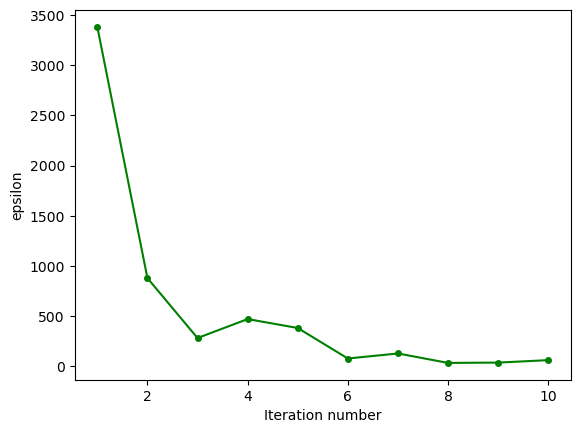

In [55]:
#Plotting mean square error vs number of clusters
import matplotlib.pyplot as plt
a = list(range(1,rangek+1)) #Number of iterations = 15
plt.plot(a, [x for x in epsilon], 'go-', linewidth=1.5, markersize=4)
plt.xlabel('Iteration number') 
plt.ylabel('epsilon')
plt.show()

In [56]:
# function to apply k-means clustering. Takes arguement a dataframe and number of clusters.
def k_means(cluster,k):
  # Read data file into 'cluster'
  rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.

  centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
  centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
  centroids.set_index('new',inplace = True) 
  d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

  number_of_iterations = 20
  temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

  for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

      for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
          d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
      cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

      mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
      mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
      for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
          mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
          mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
      centroids.replace(list(centroids['pc1']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
      centroids.replace(list(centroids['pc2']),mean_y,inplace = True)
  return cluster

In [57]:
kmeans = k_means(reduced_data,6)
kmeans.astype({'centroid number':'int32'}).dtypes
kmeans.head(10)

,pc1,pc2,centroid number
0,6.528816,10.800553,2.0
1,6.632435,10.823973,2.0
2,7.447100,9.876619,2.0
3,5.197423,6.903481,2.0
4,6.995344,7.672512,2.0
5,5.832570,8.440394,2.0
6,7.810161,6.665106,6.0
7,7.921773,6.743504,6.0
8,9.039816,6.308887,6.0
9,7.559632,8.734005,2.0


Text(0.5, 1.0, 'K-Means clustering')

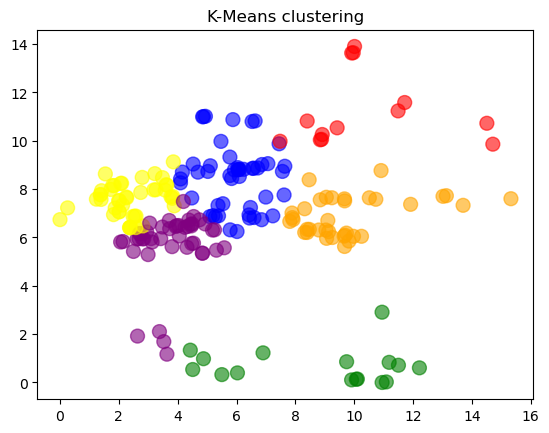

In [58]:
#plotting the clusters for K means
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
kmeans['c'] = kmeans['centroid number'].map({ 1:colors[0], 2:colors[1],3:colors[2],4:colors[3],5:colors[4],6:colors[5]})
plt.scatter(kmeans.pc1, kmeans.pc2 , c=kmeans.c,  alpha = 0.6, s=100)
plt.title("K-Means clustering")

In [59]:
kmeans

,pc1,pc2,centroid number,c
0,6.528816,10.800553,2.0,blue
1,6.632435,10.823973,2.0,blue
2,7.447100,9.876619,2.0,blue
3,5.197423,6.903481,2.0,blue
4,6.995344,7.672512,2.0,blue
...,...,...,...,...
200,8.795214,6.310207,6.0,orange
201,9.975090,6.048241,6.0,orange
202,10.734695,7.581324,6.0,orange
203,9.741580,0.859182,3.0,green


In [60]:
#统计聚类后每个集群的车型数
kmeans.groupby('centroid number')['pc1'].count()

centroid number
1.0    13
2.0    49
3.0    16
4.0    45
5.0    46
6.0    36
Name: pc1, dtype: int64

In [61]:
df = car_data.loc[:,['car_ID','CarName','carBrand']] 
df['centroid number'] = kmeans.loc[:,['centroid number']]
df.loc[df['centroid number']==1.0]

,car_ID,CarName,carBrand,centroid number
49,50,jaguar xk,jaguar,1.0
72,73,buick skylark,buick,1.0
74,75,buick regal sport coupe (turbo),buick,1.0
104,105,nissan teana,nissan,1.0
105,106,nissan kicks,nissan,1.0
106,107,nissan clipper,nissan,1.0
125,126,porsche macan,porsche,1.0
126,127,porcshce panamera,porsche,1.0
127,128,porsche cayenne,porsche,1.0
128,129,porsche boxter,porsche,1.0


### K-Mediods

In [62]:
#function to perform k-mediods on 'dataframe' with 'k' number of clusters
def k_mediods(dataframe,k):
  rows = dataframe.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = dataframe.shape[1] # 'cols' contains the total number of columns in cluster data.
  mediods = dataframe.loc[np.random.randint(1,rows+1,k)]
  mediods['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
  mediods.set_index('new',inplace = True)
  d = np.random.rand(rows)
  for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
    d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
  dataframe['cluster']=d
  no_of_iterations=30
  
  for it in range(no_of_iterations):
    fg=1
    while(fg==1):
      fg=0
      o_random=dataframe.loc[np.random.randint(1,rows+1)]
      for i in range(len(mediods)):
        o_mediod=[mediods.iloc[i,0],mediods.iloc[i,1]]  #select a random point
        cluster_no=dataframe[dataframe['pc1']==o_mediod[0]]
        cluster_no=list(dataframe[dataframe['pc2']==o_mediod[1]]['cluster'])
        prev_cost=0
        after_cost=0
        temp_df=dataframe[dataframe['cluster']==cluster_no[0]]
        for a in range(len(temp_df)):
          prev_cost=prev_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) #cost before swapping
        mediods.iloc[i,0],mediods.iloc[i,1]=o_random['pc1'],o_random['pc2']
        for a in range(len(temp_df)):
            after_cost= after_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) # cost after swapping
        if(after_cost>=prev_cost):
          mediods.iloc[i,0],mediods.iloc[i,1]=o_mediod[0],o_mediod[1] # if after cost >= prev cost, no need to swap
        else:
          fg=1
          break
    for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
      d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
    dataframe['cluster']=d
  return dataframe

In [ ]:
reduced_data.pop("centroid number")
reduced_data.pop("c")

In [68]:
import copy
kmediods = k_mediods(copy.deepcopy(reduced_data),6)
kmediods.astype({'cluster':'int32'}).dtypes
kmediods.head(10)

,pc1,pc2,cluster
0,6.528816,10.800553,5.0
1,6.632435,10.823973,5.0
2,7.447100,9.876619,5.0
3,5.197423,6.903481,1.0
4,6.995344,7.672512,5.0
5,5.832570,8.440394,5.0
6,7.810161,6.665106,1.0
7,7.921773,6.743504,1.0
8,9.039816,6.308887,6.0
9,7.559632,8.734005,5.0


Text(0.5, 1.0, 'K-Mediods clustering')

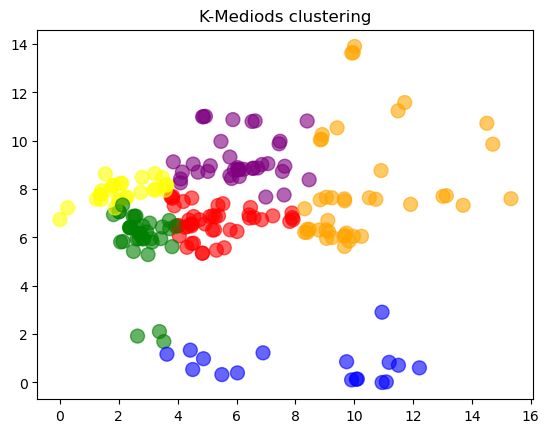

In [75]:
#plotting the clusters for K means
kmediods['c'] = kmediods['cluster'].map({ 1:colors[0], 2:colors[1],3:colors[2],4:colors[3],5:colors[4],6:colors[5]})
plt.scatter(kmediods.pc1, kmediods.pc2 , c=kmediods.c,  alpha = 0.6, s=100)
plt.title("K-Mediods clustering")

In [76]:
#统计聚类后每个集群的车型数
kmediods.groupby('cluster')['pc1'].count()

cluster
1.0    45
2.0    17
3.0    36
4.0    27
5.0    38
6.0    42
Name: pc1, dtype: int64

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
def visual(key , t, x):
  if key == "single":
    z = linkage(x,'single')
  else:
    z = linkage(x, "complete")
  for i in range(len(z)):
   z[i][2] = z[i][2]/1e+10

  plt.figure(figsize =[25,10])
  plt.xlabel('index')
  plt.ylabel('distance')
  dendrogram( z , leaf_font_size = 8 )
  plt.axhline(y=t , c='red')
  plt.show() 

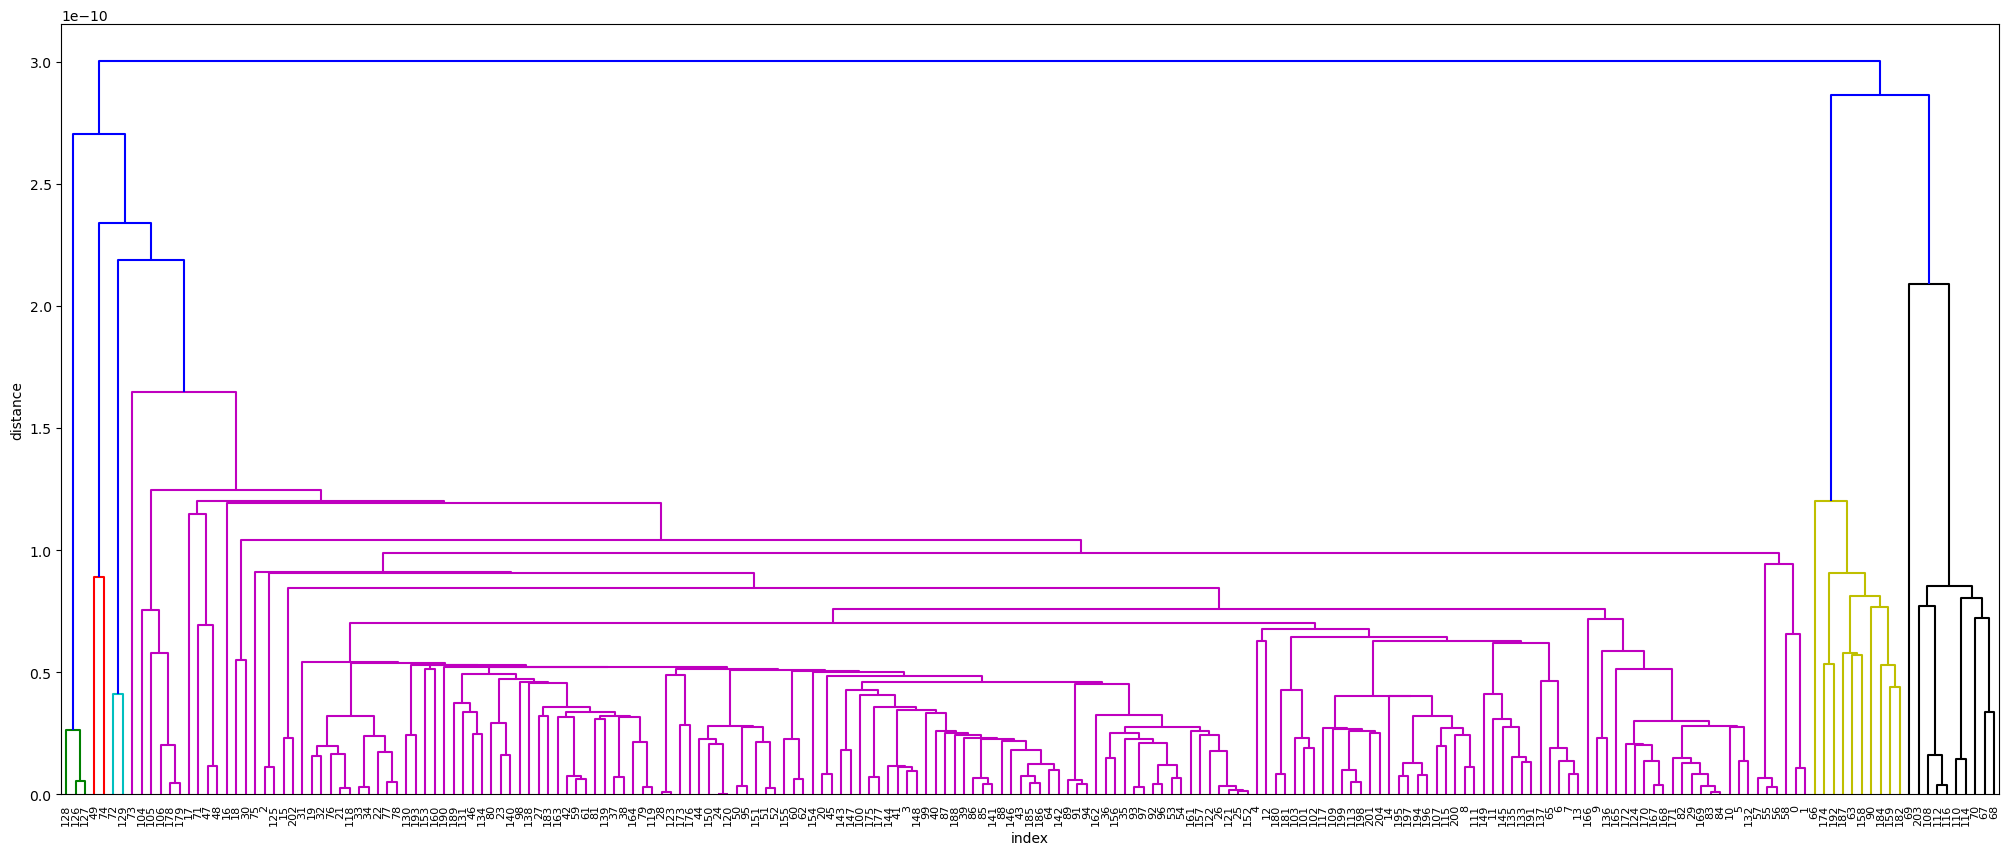

In [81]:
visual('single',810,reduced_data)

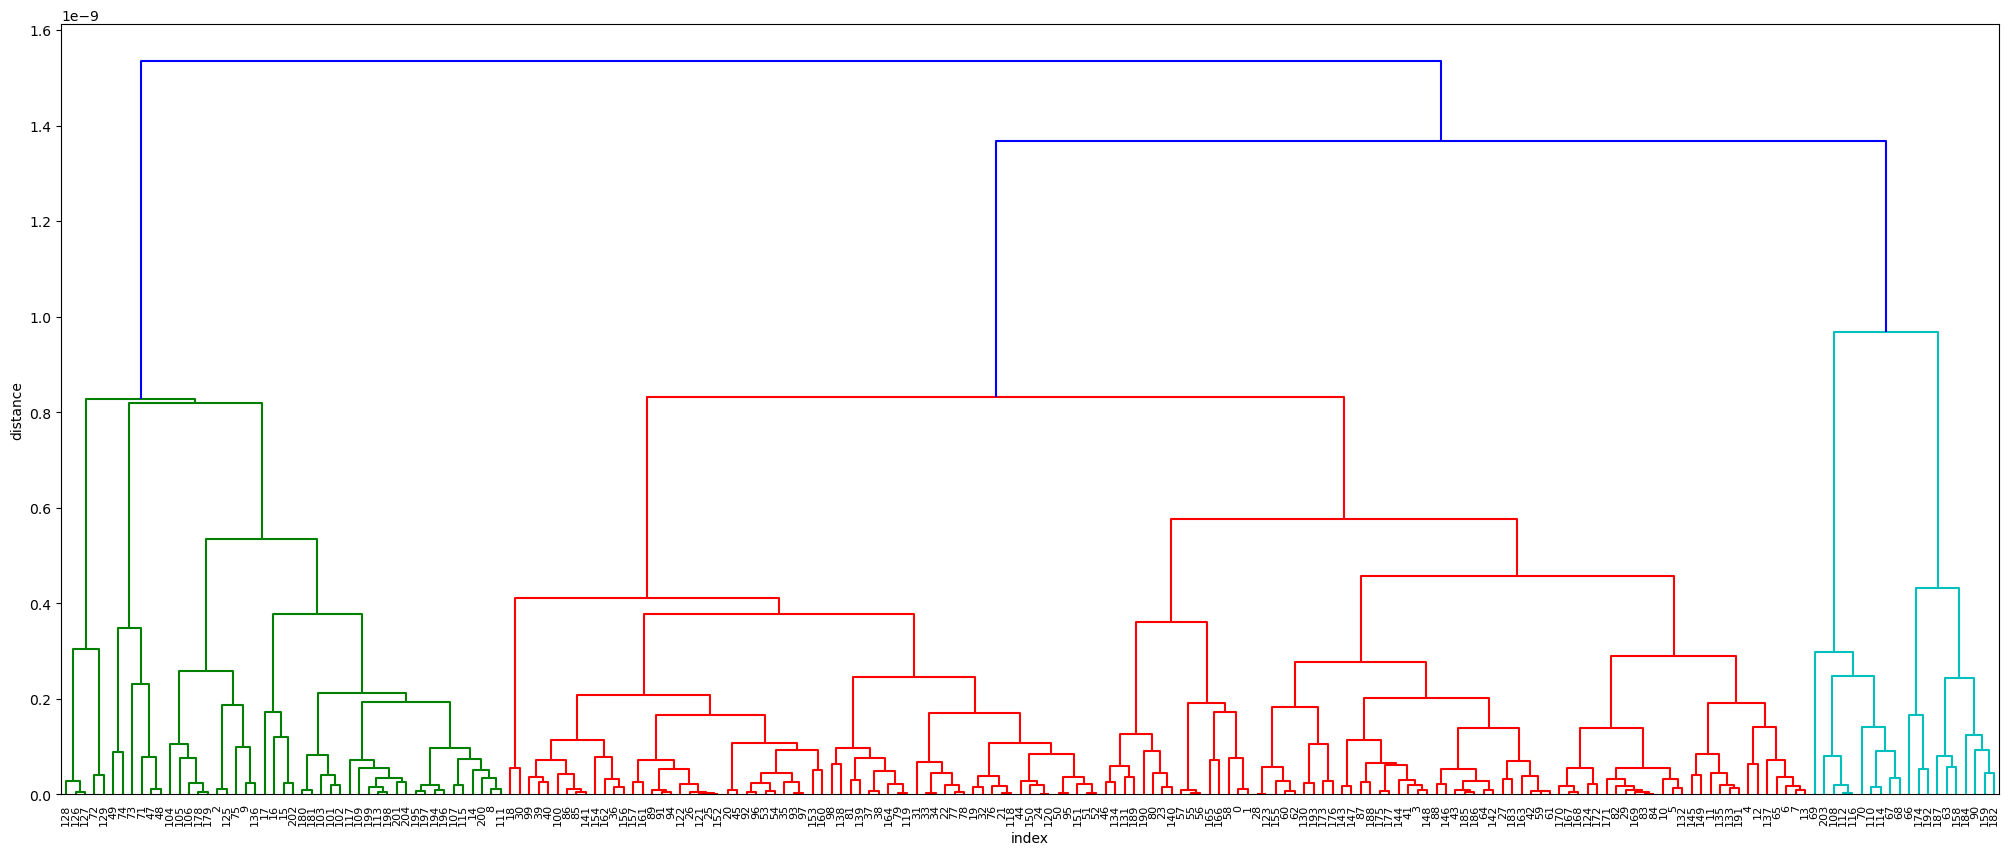

In [82]:
visual('complete',40000,reduced_data)

In [89]:
def eudist(i , j , x):        #function to calculate euclidean distance
  if i > j :
    p = pow(x[i]-x[j], 2)
    d = np.sum(p)
  else:
    d = 0                     # value of inputs of upper triangle and diagonal is 0  
  return np.sqrt(d)
  
    
def comp( d , mins , i , j):  # function to calculate the minimun distance with its row and column in the matrix 
  if d < mins[0]:
    mins = [ d , i , j ]
  return mins

def no(cluster_list):         #function to calculate no of clusters in the list
  a = 0
  for i in cluster_list:
    if i[0] != 'p':
      a = a+1
  return a

def initilizing_cluster_list():   #list to check the clusters
  cluster_list = []             
  for i in range(len(x)):
    cluster_list.append([i])
  return cluster_list

def creat_data(x):            #augmented matrix
  data = pd.DataFrame()    
  for c in range(len(x)):
    column =[]
    for r in range(len(x)):
      d = eudist(r,c,x)
      column.append(d)
    data[c] = column
  return data

def clustering(x , method):

  data = creat_data(x)                  #creat the distance matrix
  
  cluster_list = initilizing_cluster_list()  # initilizing cluster list

  if method == "single":
    threshold = 810e+10
  else:
    threshold = 40000e+10


  for b in range(len(x)):
    p = data.columns[1]
    q = data.columns[0]
    comp_li = [data.loc[p,q] , p ,q]    # initilizing comp_lil


    for r1 in data.columns:             # computing minimum distance in the augmented matrix
      k = 0
      while data.columns[k] != r1:
        c1 = data.columns[k]
        comp_li = comp(data.loc[r1,c1],comp_li,r1,c1)
        k = k+1
          

    r2 = comp_li[1]                     #row of min distance
    c2 = comp_li[2]                     #column of min distance

    if comp_li[0] > threshold:          #condition to terminate the loop
        break

    #update the column

    change = np.array(data[r2])        
    for values , i in enumerate(change):
      count = data.columns[values]
      if i!= 0:
        if method == 'single':
          change[values] =  min( data.loc[count,r2] ,data.loc[count,c2] )
        else:
          change[values] =  max( data.loc[count,r2] ,data.loc[count,c2] )
    data[r2]=change

    #update the row

    change = np.array(data.loc[r2])   
    for values,i in enumerate(change):
      a = data.columns[values]
      if a == r2:
        break
      else:
        if a != c2:
          if method == 'single':
            change[values] = min( data.loc[r2,a] , data.loc[max(a,c2) ,min(a,c2)] )
          else:
            change[values] = max( data.loc[r2,a] , data.loc[max(a,c2) ,min(a,c2)] )
    data.loc[r2] = change

    data = data.drop(c2 , axis = 1)
    data = data.drop(c2 , axis = 0)

    cluster_list[r2].extend(cluster_list[c2])
    cluster_list[c2]=['p']

  z = len(cluster_list) #free the list of ['p']
  lt = 0
  while lt != z:
    z = len(cluster_list)
    if cluster_list[lt] == ['p']:
      del cluster_list[lt]
    else:
      lt = lt+1
  return cluster_list




In [90]:
cl = clustering(reduced_data , 'complete')

KeyError: 1